### This Code was heavily inspired by Deep Reinforcement Learning in Action by Alexander Zai and Brandon Brown. While the implementations were typed from scratch and from memory, the content heavily refers to the code in the book, so I do not take credit for the code here 

In [1]:
import torch
from Gridboard import *
import matplotlib.pyplot as plt 
from collections import deque 
import numpy as np 
import random 
from IPython.display import clear_output
import copy 

In [3]:
game = Board(4)
game.init_board()
game.board_to_matrix()

array([[[0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [89]:
game.makeMove('d')
game.makeMove('d')
game.makeMove('l')
game.display()

[['+' '-' ' ' ' ']
 [' ' 'W' ' ' ' ']
 [' ' ' ' 'P' ' ']
 [' ' ' ' ' ' ' ']]


In [92]:
torch.nn.Flatten(0,2)(torch.from_numpy(game.board_to_matrix()).float())

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [101]:
l1 = 64 
l2 = 150 
l3 = 100 
l4 = 4 

model = torch.nn.Sequential(
    torch.nn.Flatten(-3,-1),
    torch.nn.Linear(l1,l2), 
    torch.nn.ReLU(), 
    torch.nn.Linear(l2,l3), 
    torch.nn.ReLU(), 
    torch.nn.Linear(l3,l4)
)

loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9 
epsilon = 1.0 
learning_rate = 1e-3 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [4]:
action_set = {
    0: 'u', 
    1: 'd', 
    2: 'l', 
    3: 'r'
}

In [103]:
np.random.rand(4,4,4)/10.0

array([[[0.02231542, 0.01859112, 0.02110128, 0.07261784],
        [0.06659297, 0.02501584, 0.02018101, 0.0206277 ],
        [0.07617657, 0.02458787, 0.0595197 , 0.0922011 ],
        [0.08225516, 0.09280875, 0.04641652, 0.07732135]],

       [[0.03541423, 0.06574983, 0.001182  , 0.03678303],
        [0.08714855, 0.0059709 , 0.02829011, 0.09699757],
        [0.04810513, 0.04096465, 0.03832018, 0.08716283],
        [0.02062249, 0.04922914, 0.06397434, 0.0985246 ]],

       [[0.08742069, 0.01317365, 0.01592673, 0.06578863],
        [0.01286474, 0.02739475, 0.08535088, 0.08207035],
        [0.06525092, 0.0099331 , 0.02312441, 0.01066105],
        [0.00930579, 0.06629201, 0.04587164, 0.02095512]],

       [[0.01532709, 0.07382716, 0.04440564, 0.07740763],
        [0.00085471, 0.01379103, 0.05464162, 0.09562223],
        [0.06047787, 0.04308632, 0.09408156, 0.05230749],
        [0.05369091, 0.05356794, 0.08432895, 0.05005346]]])

In [104]:
epochs = 1000
losses = [] #A
for i in range(epochs): #B
    game = Board(4) 
    game.init_board()
    state_ = game.board_to_matrix() + np.random.rand(4,4,4)/10.0 #D
    state = torch.from_numpy(state_).float() #E
    status = 1 #F
    state1=state
    while(status == 1): #G
        qval = model(state1) #H
        qval_ = qval.data.numpy()
        if (random.random() < epsilon): #I
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qval_)
        
        action = action_set[action_] #J
        game.makeMove(action) #K
        state2_ = game.board_to_matrix() + np.random.rand(4,4,4)/10.0
        state2 = torch.from_numpy(state2_).float() #L
        reward = game.reward()
        with torch.no_grad():
            newQ = model(state2)
        maxQ = torch.max(newQ) #M
        if reward == -1: #N
            Y = reward + (gamma * maxQ)
        else:
            Y = reward
        Y = torch.Tensor([Y]).detach()
        X = qval.squeeze()[action_] #O
        loss = loss_fn(X, Y) #P
        print(i, loss.item())
        clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        state1 = state2
        if reward != -1: #Q
            status = 0
    if epsilon > 0.1: #R
        epsilon -= (1/epochs)

0 0.9965137839317322


NameError: name 'clear_output' is not defined

In [105]:
epochs = 1000
losses = []

for i in range(epochs): 
    game = Board(4)
    game.init_board(deterministic=True) 
    state_ = game.board_to_matrix() + np.random.rand(4,4,4)/10.0
    state = torch.from_numpy(state_).float()
    status = 1 
    state1 = state
    while(status == 1): 
        qval = model(state1)
        qval_ = qval.data.numpy()
        if (random.random() < epsilon): 
            action_ = np.random.randint(0,4) 
        else: 
            action_ = np.argmax(qval_)
#         print(action_)
        
        action = action_set[action_]
        game.makeMove(action)
        state2 = torch.from_numpy(game.board_to_matrix() + np.random.rand(4,4,4)/10.0).float()
        reward = game.reward()
        with torch.no_grad(): 
            newQ = model(state2)
        maxQ = torch.max(newQ)
        if reward == -1: 
            Y = reward + (gamma * maxQ)
        else: 
            Y = reward
        Y = torch.Tensor([Y]).detach() 
        X = qval.squeeze()[action_]
        loss = loss_fn(X, Y)
        print(i, loss.item(), end="\r")
#         clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward() 
        losses.append(loss.item())
        optimizer.step()
        state1 = state2 
        if reward != -1: 
#             print(reward)
            status = 0 
    if epsilon > 0.1: 
        epsilon -= (1/epochs)
        

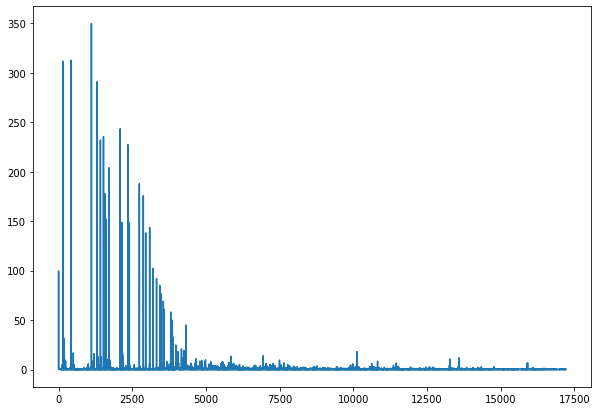

In [106]:
plt.figure(figsize = (10,7))
plt.plot(losses)

In [2]:
def test_model(model, deterministic=True, display=True): 
    i = 0 
    test_game = Board(4)
    test_game.init_board(deterministic=deterministic)
    state_ = game.board_to_matrix() + np.random.rand(4,4)/10.0
    state = torch.from_numpy(state_).float()
    if display: 
        print("Initial state")
        print(test_game.display())
    status = 1
    while (status == 1): 
        qval = model(state)
        qval_ = qval.data.numpy() 
        action_ = np.argmax(qval_)
        action = action_set[action_]
        if display: 
            print(f'Move #: {i}; Taking action: {action}')
        test_game.makeMove(action)
        state_ = test_game.board_to_matrix() + np.random.rand(4,4)/10.0
        state = torch.from_numpy(state_).float() 
        if display: 
            test_game.display()
        reward = test_game.reward() 
        if reward != -1: 
            if reward > 0: 
                status = 2
                if display: 
                    print(f"Game won! Reward: {reward}")
            else: 
                status = 0 
                if display: 
                    print(f"Game LOST. Reward: {reward}")
        i += 1 
        if (i > 15): 
            if display: 
                print("Game lost; too many moves.")
            break 
    win = True if status == 2 else False 
    return win
                          

In [105]:
game = Board(4)
board = game.init_board()
reward = -1 
counter = 0
while reward == -1: 
    move = model(torch.from_numpy(game.board_to_matrix()).float())
    move = np.argmax(move.data.numpy())
    action = action_set[move]
    print(action)
    game.makeMove(action)
    game.display()
    reward = game.reward()
    counter += 1
    if counter > 15:
        break

d
[['+' '-' ' ' ' ']
 [' ' 'W' ' ' 'P']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
d
[['+' '-' ' ' ' ']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' 'P']
 [' ' ' ' ' ' ' ']]
l
[['+' '-' ' ' ' ']
 [' ' 'W' ' ' ' ']
 [' ' ' ' 'P' ' ']
 [' ' ' ' ' ' ' ']]
l
[['+' '-' ' ' ' ']
 [' ' 'W' ' ' ' ']
 [' ' 'P' ' ' ' ']
 [' ' ' ' ' ' ' ']]
l
[['+' '-' ' ' ' ']
 [' ' 'W' ' ' ' ']
 ['P' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
u
[['+' '-' ' ' ' ']
 ['P' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]
u
[['P' '-' ' ' ' ']
 [' ' 'W' ' ' ' ']
 [' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']]


### Q Learning with experience replay to tackle catastrophic forgetting

In [64]:
l1 = 64 
l2 = 150 
l3 = 100 
l4 = 4

model = torch.nn.Sequential(
    torch.nn.Flatten(-3,-1), # flatten the 2d game state to a 1d vector
    torch.nn.Linear(l1,l2),  
    torch.nn.ReLU(), 
    torch.nn.Linear(l2,l3), 
    torch.nn.ReLU(), 
    torch.nn.Linear(l3,l4)
)

lr=1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()
epsilon = 0.3
gamma = 0.9 

In [65]:
# set hyperparameters, epochs, discount factor, epsilon, memory size and batch size 
# run for number of epochs 
# initialize new game and get the state 
# Play while havent lost or won up till a certain maximum number of moves 
# get predicted Q values and use epsilon to determine randomness 
# make the move and get the reward for the new state 
# check if the replay actions have exceeded the batch size 
# if exceeded, sample a minibatch 
# recompute the q1 value for the mini batch to get gradients 
# recompute the q2 values without gradient 
# calculate the reward which is current reward + predicted reward if game won, then future state is none 
# ground truth is the current maximum reward for the current action 
# back propagate the loss 
# step the optimizer
# if the game has ended go to new epoch 

In [66]:
epochs = 5000 
mem = 1000 
batch_size = 200 
max_moves = 50 
replay_list = deque(maxlen=mem)
losses = []

action_set = {
    0: "u", 
    1: "d",
    2: "l", 
    3: "r"
}

for i in range(epochs): 
    game = Board(4)
    game.init_board(deterministic=False)
    state1 = game.board_to_matrix().reshape(1,4,4,4) + np.random.rand(1,4,4,4)/10
    state1 = torch.from_numpy(state1).float() 
    status = 1
    n_moves = 0
    while status == 1:    
        n_moves += 1 
        q1 = model(state1)
        _q1 = q1.data.numpy() 
        if np.random.random() < epsilon: 
            action_ = np.random.randint(0,4)
        else: 
            action_ = np.argmax(_q1)
        action = action_set[action_] 
        print(action)
        game.makeMove(action)
        state2_ = game.board_to_matrix().reshape(1,4,4,4) + np.random.rand(1,4,4,4)/10
        state2 = torch.from_numpy(state2_).float() 
        reward = game.reward() 
        done = True if reward > 0 else False
        exp = (state1, action_, state2, reward, done)
        replay_list.append(exp)
        state1 = state2
        
        if len(replay_list) > batch_size: 
            minibatch = random.sample(replay_list, batch_size)
            rs = torch.Tensor([reward for (state1, action, state2, reward, done) in minibatch])
            state1s = torch.cat([state1 for (state1, action, state2, reward, done) in minibatch], dim=0)
            state2s = torch.cat([state2 for (state1, action, state2, reward, done) in minibatch], dim=0)
            actions = torch.Tensor([action for (state1, action, state2, reward, done) in minibatch])
            dones = torch.Tensor([done for (state1, action, state2, reward, done) in minibatch])
            
            #recompute the q values for gradient computation  
            Q1s = model(state1s)
            with torch.no_grad(): 
                Q2s = model(state2s)
            Y = rs + (gamma * (1 - dones) * torch.max(Q2s, dim=1)[0]) 
            X = Q1s.gather(dim=1,index=actions.long().unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y.detach())
            optimizer.zero_grad() 
            loss.backward() 
            losses.append(loss.item())
            print(i, ": ", loss.item())
            clear_output(wait=True)
            
            optimizer.step() 

        if reward != -1 or n_moves>max_moves: 
            status = 0 
            mov=0


d
4999 :  0.06271923333406448


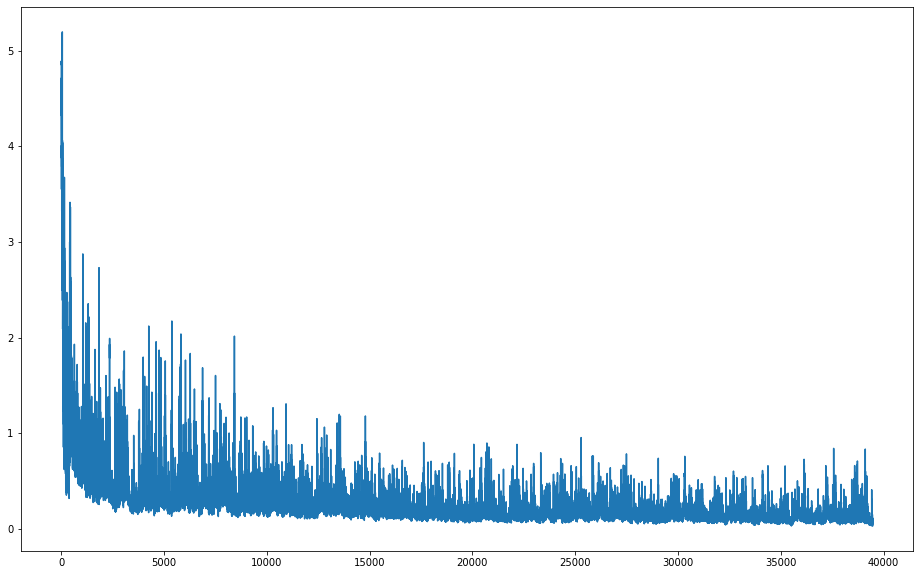

In [72]:
plt.figure(figsize=(16,10))
plt.plot(losses)

In [79]:
max_games = 1000
wins = 0
for i in range(max_games):
    win = test_model(model, deterministic=False, display=False)
    if win:
        wins += 1
win_perc = float(wins) / float(max_games)
print("Games played: {0}, # of wins: {1}".format(max_games,wins))
print("Win percentage: {}".format(win_perc))

Games played: 1000, # of wins: 797
Win percentage: 0.797


In [88]:
test_model(model, deterministic=False, display=True)

Initial state
[[' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']
 ['W' ' ' '+' ' ']
 [' ' '-' ' ' 'P']]
None
Move #: 0; Taking action: u
[[' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']
 ['W' ' ' '+' 'P']
 [' ' '-' ' ' ' ']]
Move #: 1; Taking action: l
[[' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ']
 ['W' ' ' 'P' ' ']
 [' ' '-' ' ' ' ']]
Game won! Reward: 10


True

In [7]:
# ma
l1 = 64 
l2 = 150 
l3 = 100 
l4 = 4

model1 = torch.nn.Sequential(
    torch.nn.Flatten(-3,-1), 
    torch.nn.Linear(l1,l2), 
    torch.nn.ReLU(), 
    torch.nn.Linear(l2,l3), 
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4)
)

model2 = copy.deepcopy(model1)
model2.load_state_dict(model1.state_dict())

gamma = 0.9 
epsilon = 0.3
lr = 1e-3
optimizer = torch.optim.Adam(model1.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()


In [ ]:
mem_size = 1000 
batch_size = 200
replay = deque(maxlen=mem_size)
max_moves = 50 
sync_freq = 500
epochs = 5000
losses = []
j = 0 

for i in range(epochs): 
    game = Board(4)
    game.init_board(deterministic=False)
    state1_ = game.board_to_matrix().reshape(1,4,4,4) + np.random.rand(1,4,4,4)/10
    state1 = torch.from_numpy(state1_).float() 
    status = 1
    mov = 0 
    while status == 1: 
        mov += 1
        j += 1 
        qval = model1(state1)
        qval_ = qval.data.numpy()
        if np.random.random() < epsilon: 
            action_ = np.random.randint(0,4)
        else: 
            action_ = np.argmax(qval_)
        action = action_set[action_]
        game.makeMove(action)
        reward = game.reward() 
        state2_ = game.board_to_matrix().reshape(1,4,4,4) + np.random.rand(1,4,4,4)/10
        state2 = torch.from_numpy(state2_).float()
        
        done = reward > 0 
        exp = (state1, action_, reward, state2, done)
        replay.append(exp)
        state1 = state2 
        
        if len(replay) > batch_size: 
            minibatch = random.sample(replay, batch_size)
            rewards_batch = torch.Tensor([r for (s1, a, r, s2, done) in minibatch])
            state1_batch = torch.cat([s1 for (s1, a, r, s2, done) in minibatch])
            state2_batch = torch.cat([s2 for (s2, a, r, s2, done) in minibatch])
            actions_batch = torch.Tensor([a for (s1, a, r, s2, done) in minibatch])
            done_batch = torch.Tensor([done for (s1, a, r, s2, done) in minibatch])
            
            q1s = model1(state1_batch)
            with torch.no_grad(): 
                q2s = model2(state2_batch)
            
            Y = rewards_batch + gamma * ((1-done_batch) * torch.max(q2s,dim=1)[0])
            X = q1s.gather(dim=1, index=actions_batch.long().unsqueeze(dim=1)).squeeze() 
            loss = loss_fn(X, Y.detach())
            optimizer.zero_grad() 
            print(i, ": ", loss.item())
            clear_output(wait=True)
            losses.append(loss.item())
            loss.backward() 
            optimizer.step() 
            
            if j%sync_freq == 0: 
                model2.load_state_dict(model1.state_dict())
                
        if reward != -1 or mov >= max_moves: 
            status = 0 
            mov = 0

4871 :  0.1151687502861023


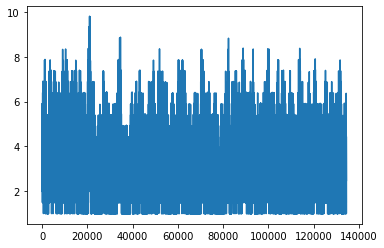

In [105]:
plt.plot(losses)